# Exercício PA2-1

Exercício com data de entrega para 26 de outubro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

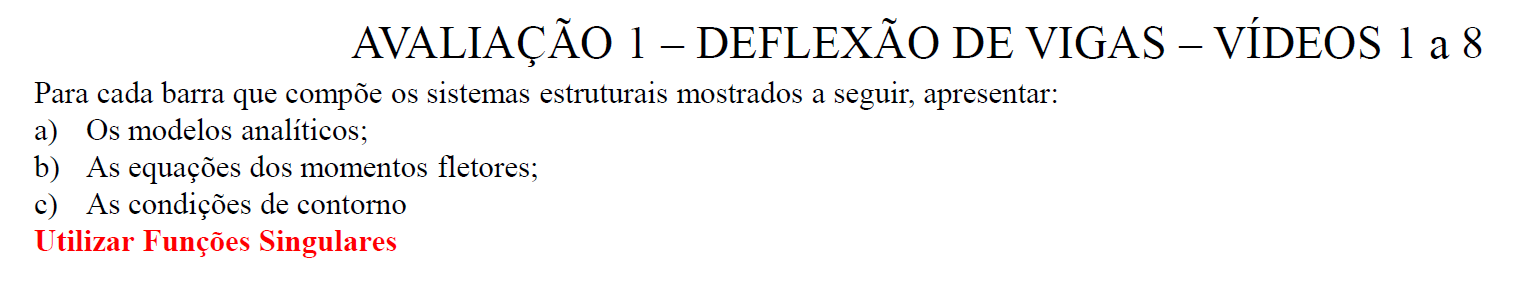

In [2]:
Image("Figuras/PA2-1-0.png")

# Sistema Estrutural 1

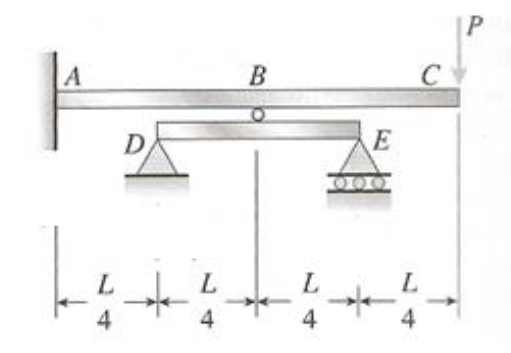

In [3]:
Image("Figuras/PA2-1-1.png")

Temos, nessa estrutura, as seguintes reações de apoio:

* $V_{A}$

* $V_{D}$

* $V_{E}$

* $M_{A}$

E temos, também, em B, uma força vertical transmitida da barra superior para a barra inferior, que chamaremos de $F_{B}$. Descartamos as reações horizontais por não haver esforço solicitante nesta direção.

Temos, então, as seguintes equações para a barra superior, que chamaremos de barra 1:

\begin{equation*}
    \sum{F_{y}} = 0 \therefore
    V_{A} + F_{B} - P = 0
\end{equation*}

\begin{equation*}
    \sum{M_{z}} = 0 \therefore
    M_{A} + \frac{L}{2}F_{B} - LP = 0
\end{equation*}

E, na barra inferior, que nominaremos barra 2, temos:

\begin{equation*}
    \sum{F_{y}} = 0 \therefore
    V_{D} - F_{B} + V_{E} = 0
\end{equation*}

\begin{equation*}
    \sum{M_{z}} = 0 \therefore
    -\frac{L}{4}F_{B} + \frac{L}{2}V_{E} = 0
\end{equation*}

Temos, portanto, quatro equações e cinco variáveis. Resumindo:

\begin{equation*}
    \left[\begin{matrix}
        1 & 0 & 0 & 0 & 1 \\
        0 & 0 & 0 & 1 & \frac{L}{2} \\
        0 & 1 & 1 & 0 & -1 \\
        0 & 0 & \frac{L}{2} & 0 & -\frac{L}{4}
    \end{matrix}\right]
    \left[\begin{matrix}
        V_A \\ V_D \\ V_E \\ M_{A} \\ F_{B}
    \end{matrix}\right] =
    \left[\begin{matrix}
        P \\ LP \\ 0 \\ 0
    \end{matrix}\right]
\end{equation*}

Esse sistema é indeterminado.

Temos, na barra 1, a seguinte equação para o esforço cortante:

\begin{equation*}
    V_{1}\left(x\right) = V_{A} + F_{B}\left<x-\frac{L}{2}\right>^{0}
\end{equation*}

Que resulta em:

\begin{equation*}
    M_{1}\left(x\right) = EI\frac{d^{2}y}{dx^{2}} = V_{A}\cdot x + F_{B}\left<x-\frac{L}{2}\right> + M_{A}
\end{equation*}

\begin{equation*}
    EI\cdot \theta\left(x\right) = EI\frac{dy}{dx} = \frac{V_{A}}{2}\cdot x^{2} + \frac{F_{B}}{2}\left<x-\frac{L}{2}\right>^{2} + M_{A}\cdot x + C_{1}
\end{equation*}

\begin{equation*}
    EI\cdot y\left(x\right) = \frac{V_{A}}{6}\cdot x^{3} + \frac{F_{B}}{6}\left<x-\frac{L}{2}\right>^{3} + \frac{M_{A}}{2}\cdot x^{2} + C_{1}\cdot x + C_{2}
\end{equation*}

Já na barra 2, temos:

\begin{equation*}
    V_{2}\left(x\right) = V_{D} - F_{B}\left<x-\frac{L}{4}\right>^{0}
\end{equation*}

Que implica em:

\begin{equation*}
    M_{2}\left(x\right) = EI\frac{d^{2}y}{dx^{2}} = V_{D}\cdot x - F_{B}\left<x-\frac{L}{4}\right>
\end{equation*}

\begin{equation*}
    EI\cdot \theta\left(x\right) = EI\frac{dy}{dx} = \frac{V_{D}}{2}\cdot x^{2} - \frac{F_{B}}{2}\left<x-\frac{L}{4}\right>^{2} + C_{3}
\end{equation*}

\begin{equation*}
    EI\cdot y\left(x\right) = \frac{V_{D}}{6}\cdot x^{3} - \frac{F_{B}}{6}\left<x-\frac{L}{4}\right>^{3} + C_{3}\cdot x + C_{4}
\end{equation*}

Temos, portanto, quatro constantes de integração não determinadas.

As restrições impostas pelos apoios, impõem, na barra 1:

* $y(0) = 0$

* $\theta(0) = 0$

E, na barra 2:

* $y(0) = 0$

* $y(\frac{L}{2}) = 0$

Bem como, na interligação:

* $y_1(\frac{L}{2}) = y_{2}(\frac{L}{4})$

Portanto, a partir de $\theta_{1}(0)=0$, temos $C_{1}=0$. Em seguida, de $y_{1}(0)=0$, também temos que $C_{2}=0$. Logo:

\begin{equation*}
    EI\cdot y_{1}\left(x\right) = \frac{V_{A}}{6}\cdot x^{3} + \frac{F_{B}}{6}\left<x-\frac{L}{2}\right>^{3} + \frac{M_{A}}{2}\cdot x^{2}
\end{equation*}

Da mesma forma, considerando $y_{2}(0)=0$, temos $C_{4}=0$ e, a partir de $y_{2}(\frac{L}{2})=0$, temos:

\begin{equation*}
    \frac{V_{D}}{6} \left(\frac{L}{2}\right)^{3} - \frac{F_{B}}{6}\left<\frac{L}{2}-\frac{L}{4}\right>^{3} + C_{3}\frac{L}{2} = 0 \therefore
    - \frac{V_{D}}{6} \left(\frac{L}{2}\right)^{3} + \frac{F_{B}}{6}\left(\frac{L}{4}\right)^{3} = C_{3}\frac{L}{2}
\end{equation*}

Logo,

\begin{equation*}
    C_{3} = \left[\frac{F_{B}}{192} - \frac{V_{D}}{24}\right]L^{2}
\end{equation*}

Portanto,

\begin{equation*}
    EI\cdot y_{2}\left(x\right) = \frac{V_{D}}{6}\cdot x^{3} - \frac{F_{B}}{6}\left<x-\frac{L}{4}\right>^{3} + \left[\frac{F_{B}}{192} - \frac{V_{D}}{24}\right]L^{2}\cdot x
\end{equation*}

Tendo resolvido as constantes de integração, a última condição de contorno nos fornece $y_1(\frac{L}{2}) = y_{2}(\frac{L}{4})$, que implica em:

\begin{equation*}
    EI\cdot y_{1}\left(\frac{L}{2}\right) = EI\cdot y_{2}\left(\frac{L}{4}\right) \therefore
\end{equation*}

\begin{equation*}
    \frac{V_{A}}{6}\cdot \left(\frac{L}{2}\right)^{3} + \frac{F_{B}}{6}\left<\frac{L}{2}-\frac{L}{2}\right>^{3} + \frac{M_{A}}{2}\cdot \left(\frac{L}{2}\right)^{2} =
    \frac{V_{D}}{6}\cdot \left(\frac{L}{4}\right)^{3} - \frac{F_{B}}{6}\left<\frac{L}{4}-\frac{L}{4}\right>^{3} + \left[\frac{F_{B}}{192} - \frac{V_{D}}{24}\right]L^{2}\frac{L}{4}
\end{equation*}

\begin{equation*}
    \frac{V_{A}}{6}\cdot \left(\frac{L}{2}\right)^{3} + \frac{M_{A}}{2}\cdot \left(\frac{L}{2}\right)^{2} =
    \frac{V_{D}}{6}\cdot \left(\frac{L}{4}\right)^{3} + \left[\frac{F_{B}}{192} - \frac{V_{D}}{24}\right]L^{2}\frac{L}{4}
\end{equation*}

\begin{equation*}
    \frac{V_{A}}{48}L^{3} + \frac{M_{A}}{8}L^{2} =
    \frac{V_{D}}{384}L^{3} + \frac{F_{B}}{768}L^{3} - \frac{V_{D}}{96}L^{3}
\end{equation*}

\begin{equation*}
    \frac{V_{A}}{48}L + \frac{M_{A}}{8} =
    \frac{V_{D}}{384}L + \frac{F_{B}}{768}L - \frac{V_{D}}{96}L
\end{equation*}

Rearrumando, temos:

\begin{equation*}
    \frac{V_{A}}{48}L + \frac{M_{A}}{8} - \frac{V_{D}}{384}L - \frac{F_{B}}{768}L + \frac{V_{D}}{96}L = 0
\end{equation*}

Ou,

\begin{equation*}
    \frac{L}{48}V_{A} + \frac{L}{128}V_{D} + \frac{1}{8}M_{A} - \frac{L}{768}F_{B} = 0
\end{equation*}

Que, multiplicando a equação por $768$, resulta em:

\begin{equation*}
    16LV_{A} + 6LV_{D} + 96M_{A} - LF_{B} = 0
\end{equation*}

Através das equações do modelo estático, ao combinar à esta equação de deformação, após as devidas aplicações das condições de contorno, obtemos um sistema que pode ser determinado, composto por cinco equações e cinco incógnitas, apresentado abaixo:

\begin{equation*}
    \left[\begin{matrix}
        1 & 0 & 0 & 0 & 1 \\
        0 & 0 & 0 & 1 & \frac{L}{2} \\
        0 & 1 & 1 & 0 & -1 \\
        0 & 0 & \frac{L}{2} & 0 & -\frac{L}{4} \\
        16L & 6L & 0 & 96 & -L
    \end{matrix}\right]
    \left[\begin{matrix}
        V_A \\ V_D \\ V_E \\ M_{A} \\ F_{B}
    \end{matrix}\right] =
    \left[\begin{matrix}
        P \\ LP \\ 0 \\ 0 \\ 0
    \end{matrix}\right]
\end{equation*}

Este sistema permite obter todas as reações de apoio, bem como a força transmitida na interligação entre as barras.

In [4]:
L,P = sp.symbols('L,P')

In [5]:
A = sp.Matrix([[1,0,0,0,1],[0,0,0,1,L/2],[0,1,1,0,-1],[0,0,L/2,0,-L/4],[16*L,6*L,0,96,-L]])
b = sp.Matrix([[P],[L*P],[0],[0],[0]])
x = A.solve(b)
display(x)

⎡-25⋅P ⎤
⎢──────⎥
⎢  31  ⎥
⎢      ⎥
⎢ 28⋅P ⎥
⎢ ──── ⎥
⎢  31  ⎥
⎢      ⎥
⎢ 28⋅P ⎥
⎢ ──── ⎥
⎢  31  ⎥
⎢      ⎥
⎢3⋅L⋅P ⎥
⎢───── ⎥
⎢  31  ⎥
⎢      ⎥
⎢ 56⋅P ⎥
⎢ ──── ⎥
⎣  31  ⎦

A solução do sistema é:

\begin{equation*}
    \left\{\begin{matrix}
        V_{A} & = & -\frac{25}{31}P \\
        V_{D} & = & \frac{28}{31}P \\
        V_{E} & = & \frac{28}{31}P \\
        M_{A} & = & \frac{3}{31}LP \\
        F_{B} & = & \frac{56}{31}P \\
    \end{matrix}\right.
\end{equation*}

# Sistema Estrutural 2

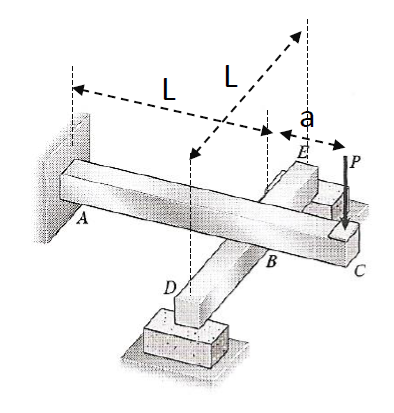

In [6]:
Image("Figuras/PA2-1-2.png")

Temos, nessa estrutura, tal como na anterior, as seguintes reações de apoio:

* $V_{A}$

* $V_{D}$

* $V_{E}$

* $M_{A}$

E temos, novamente, em B, uma força vertical transmitida da barra superior para a barra inferior, que chamaremos de $F_{B}$. Descartamos as reações horizontais por não haver esforço solicitante nesta direção.

Temos, então, as seguintes equações para a barra superior, que chamaremos de barra 1:

\begin{equation*}
    \sum{F_{y}} = 0 \therefore
    V_{A} + F_{B} - P = 0
\end{equation*}

\begin{equation*}
    \sum{M_{z}} = 0 \therefore
    M_{A} + LF_{B} - \left(L+a\right)P = 0
\end{equation*}

E, na barra inferior, que nominaremos barra 2, temos:

\begin{equation*}
    \sum{F_{y}} = 0 \therefore
    V_{D} - F_{B} + V_{E} = 0
\end{equation*}

\begin{equation*}
    \sum{M_{z}} = 0 \therefore
    -\frac{L}{2}F_{B} + LV_{E} = 0
\end{equation*}

Temos, portanto, quatro equações e cinco variáveis. Resumindo:

\begin{equation*}
    \left[\begin{matrix}
        1 & 0 & 0 & 0 & 1 \\
        0 & 0 & 0 & 1 & L \\
        0 & 1 & 1 & 0 & -1 \\
        0 & 0 & L & 0 & -\frac{L}{2}
    \end{matrix}\right]
    \left[\begin{matrix}
        V_A \\ V_D \\ V_E \\ M_{A} \\ F_{B}
    \end{matrix}\right] =
    \left[\begin{matrix}
        P \\ \left(L+a\right)P \\ 0 \\ 0
    \end{matrix}\right]
\end{equation*}

Esse sistema é indeterminado.

Temos, na barra 1, a seguinte equação para o esforço cortante:

\begin{equation*}
    V_{1}\left(x\right) = V_{A} + F_{B}\left<x-L\right>^{0}
\end{equation*}

Que resulta em:

\begin{equation*}
    M_{1}\left(x\right) = EI\frac{d^{2}y}{dx^{2}} = V_{A}\cdot x + F_{B}\left<x-L\right> + M_{A}
\end{equation*}

\begin{equation*}
    EI\cdot \theta\left(x\right) = EI\frac{dy}{dx} = \frac{V_{A}}{2}\cdot x^{2} + \frac{F_{B}}{2}\left<x-L\right>^{2} + M_{A}\cdot x + C_{1}
\end{equation*}

\begin{equation*}
    EI\cdot y\left(x\right) = \frac{V_{A}}{6}\cdot x^{3} + \frac{F_{B}}{6}\left<x-L\right>^{3} + \frac{M_{A}}{2}\cdot x^{2} + C_{1}\cdot x + C_{2}
\end{equation*}

Já na barra 2, temos:

\begin{equation*}
    V_{2}\left(x\right) = V_{D} - F_{B}\left<x-\frac{L}{2}\right>^{0}
\end{equation*}

Que implica em:

\begin{equation*}
    M_{2}\left(x\right) = EI\frac{d^{2}y}{dx^{2}} = V_{D}\cdot x - F_{B}\left<x-\frac{L}{2}\right>
\end{equation*}

\begin{equation*}
    EI\cdot \theta\left(x\right) = EI\frac{dy}{dx} = \frac{V_{D}}{2}\cdot x^{2} - \frac{F_{B}}{2}\left<x-\frac{L}{2}\right>^{2} + C_{3}
\end{equation*}

\begin{equation*}
    EI\cdot y\left(x\right) = \frac{V_{D}}{6}\cdot x^{3} - \frac{F_{B}}{6}\left<x-\frac{L}{2}\right>^{3} + C_{3}\cdot x + C_{4}
\end{equation*}

Temos, portanto, quatro constantes de integração não determinadas.

As restrições impostas pelos apoios, impõem, na barra 1:

* $y(0) = 0$

* $\theta(0) = 0$

E, na barra 2:

* $y(0) = 0$

* $y(L) = 0$

Bem como, na interligação:

* $y_1(L) = y_{2}(\frac{L}{2})$

Portanto, a partir de $\theta_{1}(0)=0$, temos $C_{1}=0$. Em seguida, de $y_{1}(0)=0$, também temos que $C_{2}=0$. Logo:

\begin{equation*}
    EI\cdot y_{1}\left(x\right) = \frac{V_{A}}{6}\cdot x^{3} + \frac{F_{B}}{6}\left<x-L\right>^{3} + \frac{M_{A}}{2}\cdot x^{2}
\end{equation*}

Da mesma forma, considerando $y_{2}(0)=0$, temos $C_{4}=0$ e, a partir de $y_{2}(L)=0$, temos:

\begin{equation*}
    \frac{V_{D}}{6} L^{3} - \frac{F_{B}}{6}\left<L-\frac{L}{2}\right>^{3} + C_{3}L = 0 \therefore
    - \frac{V_{D}}{6} L^{3} + \frac{F_{B}}{6}\left(\frac{L}{2}\right)^{3} = C_{3}L
\end{equation*}

Logo,

\begin{equation*}
    C_{3} = \left[\frac{F_{B}}{48} - \frac{V_{D}}{6}\right]L^{2}
\end{equation*}

Portanto,

\begin{equation*}
    EI\cdot y_{2}\left(x\right) = \frac{V_{D}}{6}\cdot x^{3} - \frac{F_{B}}{6}\left<x-\frac{L}{2}\right>^{3} + \left[\frac{F_{B}}{48} - \frac{V_{D}}{6}\right]L^{2}\cdot x
\end{equation*}

Tendo resolvido as constantes de integração, a última condição de contorno nos fornece $y_1(L) = y_{2}(\frac{L}{2})$, que implica em:

\begin{equation*}
    EI\cdot y_{1}\left(L\right) = EI\cdot y_{2}\left(\frac{L}{2}\right) \therefore
\end{equation*}

\begin{equation*}
    \frac{V_{A}}{6} L^{3} + \frac{F_{B}}{6}\left<L-L\right>^{3} + \frac{M_{A}}{2} L^{2} =
    \frac{V_{D}}{6} \left(\frac{L}{2}\right)^{3} - \frac{F_{B}}{6}\left<\frac{L}{2}-\frac{L}{2}\right>^{3} + \left[\frac{F_{B}}{48} - \frac{V_{D}}{6}\right]L^{2}\frac{L}{2}
\end{equation*}

\begin{equation*}
    \frac{V_{A}}{6} L^{3} + \frac{M_{A}}{2} L^{2} =
    \frac{V_{D}}{6} \left(\frac{L}{2}\right)^{3} + \left[\frac{F_{B}}{96} - \frac{V_{D}}{12}\right]L^{3}
\end{equation*}

\begin{equation*}
    \frac{V_{A}}{6}L^{3} + \frac{M_{A}}{2}L^{2} =
    \frac{V_{D}}{48}L^{3} + \frac{F_{B}}{96}L^{3} - \frac{V_{D}}{12}L^{3}
\end{equation*}

\begin{equation*}
    \frac{V_{A}}{6}L + \frac{M_{A}}{2} =
    \frac{V_{D}}{48}L + \frac{F_{B}}{96}L - \frac{V_{D}}{12}L
\end{equation*}

Rearrumando, temos:

\begin{equation*}
    \frac{V_{A}}{6}L + \frac{M_{A}}{2} - \frac{V_{D}}{48}L - \frac{F_{B}}{96}L + \frac{V_{D}}{12}L = 0
\end{equation*}

Ou,

\begin{equation*}
    \frac{L}{6}V_{A} + \frac{L}{16}V_{D} + \frac{1}{2}M_{A} - \frac{L}{96}F_{B} = 0
\end{equation*}

Que, multiplicando a equação por $96$, resulta em:

\begin{equation*}
    16LV_{A} + 6LV_{D} + 48M_{A} - LF_{B} = 0
\end{equation*}

Através das equações do modelo estático, ao combinar à esta equação de deformação, após as devidas aplicações das condições de contorno, obtemos um sistema que pode ser determinado, composto por cinco equações e cinco incógnitas, apresentado abaixo:

\begin{equation*}
    \left[\begin{matrix}
        1 & 0 & 0 & 0 & 1 \\
        0 & 0 & 0 & 1 & L \\
        0 & 1 & 1 & 0 & -1 \\
        0 & 0 & L & 0 & -\frac{L}{2} \\
        16L & 6L & 0 & 48 & -L
    \end{matrix}\right]
    \left[\begin{matrix}
        V_A \\ V_D \\ V_E \\ M_{A} \\ F_{B}
    \end{matrix}\right] =
    \left[\begin{matrix}
        P \\ \left(L+a\right)P \\ 0 \\ 0 \\ 0
    \end{matrix}\right]
\end{equation*}

Este sistema permite obter todas as reações de apoio, bem como a força transmitida na interligação entre as barras.

In [7]:
a = sp.symbols('a')
A = sp.Matrix([[1,0,0,0,1],[0,0,0,1,L],[0,1,1,0,-1],[0,0,L,0,-L/2],[16*L,6*L,0,48,-L]])
b = sp.Matrix([[P],[(L+a)*P],[0],[0],[0]])
x = A.solve(b)
display(x)

⎡-(L⋅P + 24⋅P⋅a) ⎤
⎢────────────────⎥
⎢      31⋅L      ⎥
⎢                ⎥
⎢16⋅L⋅P + 12⋅P⋅a ⎥
⎢─────────────── ⎥
⎢      31⋅L      ⎥
⎢                ⎥
⎢16⋅L⋅P + 12⋅P⋅a ⎥
⎢─────────────── ⎥
⎢      31⋅L      ⎥
⎢                ⎥
⎢   L⋅P   7⋅P⋅a  ⎥
⎢ - ─── + ─────  ⎥
⎢    31     31   ⎥
⎢                ⎥
⎢32⋅L⋅P + 24⋅P⋅a ⎥
⎢─────────────── ⎥
⎣      31⋅L      ⎦

A solução do sistema é:

\begin{equation*}
    \left\{\begin{matrix}
        V_{A} & = & -\frac{P}{31L}\left(L+24a\right) \\
        V_{D} & = & \frac{P}{31L}\left(16L+12a\right) \\
        V_{E} & = & \frac{P}{31L}\left(16L+12a\right) \\
        M_{A} & = & -\frac{P}{31L}\left(7La-L^{2}\right) \\
        F_{B} & = & \frac{P}{31L}32L+24a \\
    \end{matrix}\right.
\end{equation*}

# Sistema Estrutural 3

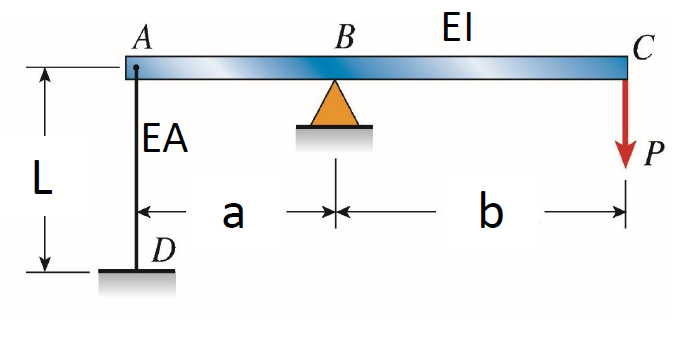

In [8]:
Image("Figuras/PA2-1-3.png")

# Sistema Estrutural 4

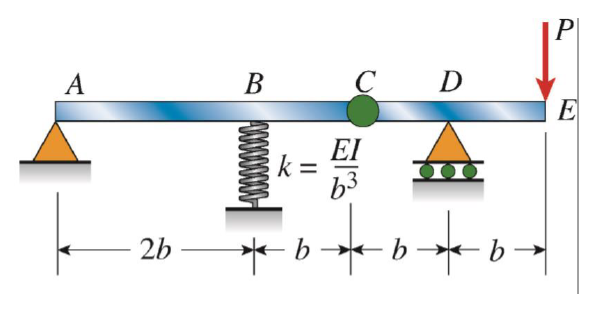

In [9]:
Image("Figuras/PA2-1-4.png")